In [319]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

import pickle

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('D:/customer-churn/customer-churn/data/scaleddata/scaleddata.csv')
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,northwest,southeast,southwest,target
0,0.586957,1.0,0.385938,0.4,0.0,0.505190,0.351901,0.5,0.122261,0.0,0.0,1.0,8027.96800
1,1.000000,1.0,0.607566,0.0,0.0,0.602559,0.449219,0.5,0.304088,0.0,0.0,1.0,13822.80300
2,0.021739,0.0,0.516240,0.0,0.0,0.822656,0.065921,0.0,0.058028,1.0,0.0,0.0,2130.67590
3,0.391304,1.0,0.392816,0.6,0.0,0.518528,0.079938,0.5,0.170850,0.0,0.0,0.0,6748.59120
4,0.021739,0.0,0.229461,0.2,0.0,0.133971,0.407823,0.5,0.077718,1.0,0.0,0.0,2709.24395


### `Train-test split`

In [4]:
X = df.drop(['target'], axis='columns')
Y = df['target']

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle=True)

In [6]:
print("The shape of X train is", X_train.shape)
print("The shape of X test is", X_test.shape)
print("The shape of Y train is",Y_train.shape)
print("The shape of Y test is", Y_test.shape)

The shape of X train is (6186, 12)
The shape of X test is (2652, 12)
The shape of Y train is (6186,)
The shape of Y test is (2652,)


## Linear Regression Model

In [7]:
linear_model = LinearRegression()

In [8]:
linear_model.fit(X_train, Y_train)

LinearRegression()

In [9]:
Y_predict = linear_model.predict(X_test)

In [12]:
linear_model_r2score = r2_score(Y_test, Y_predict)

## Support Vector Regressor

In [100]:
support_model = SVR(kernel='poly',
                    degree=10)

In [101]:
support_model.fit(X_train, Y_train)

SVR(degree=10, kernel='poly')

In [102]:
support_pred = support_model.predict(X_test)

In [104]:
support_model_score = r2_score(Y_test, support_pred)

## Decision Tree Regressor

In [142]:
decision_model = DecisionTreeRegressor(criterion='poisson',
                                       splitter='random',
                                       max_features='log2')

In [143]:
decision_model.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='poisson', max_features='log2',
                      splitter='random')

In [144]:
decision_model_pred = decision_model.predict(X_test)

In [146]:
decision_model_score = r2_score(Y_test, decision_model_pred)

## Random Forest Regression

In [206]:
random_model = RandomForestRegressor(n_estimators = 50)

In [207]:
random_model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=50)

In [208]:
random_model_pred = random_model.predict(X_test)

In [210]:
random_model_score = r2_score(Y_test, random_model_pred)

## KNeighborsRegressor

In [298]:
K_neigh = KNeighborsRegressor(n_neighbors=30)

In [299]:
K_neigh.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=30)

In [300]:
K_neigh_pred = K_neigh.predict(X_test)

In [301]:
K_neigh_score = r2_score(Y_test, K_neigh_pred)

In [320]:
file_path = "D:/customer-churn/customer-churn/artifacts/model/model.pkl"

with open(file_path, 'wb') as f:
    pickle.dump(K_neigh, f)

## r2 score Prediction

In [317]:
X_axis = ['Linear Regression', 'Support Vector', 'Decision Tree', 'Random Forest',
          'KNeighbors']

Y_val = [round(linear_model_r2score, 2),
         round(support_model_score, 2),
         round(decision_model_score,2 ),
         round(random_model_score,2),
         round(K_neigh_score, 2)]

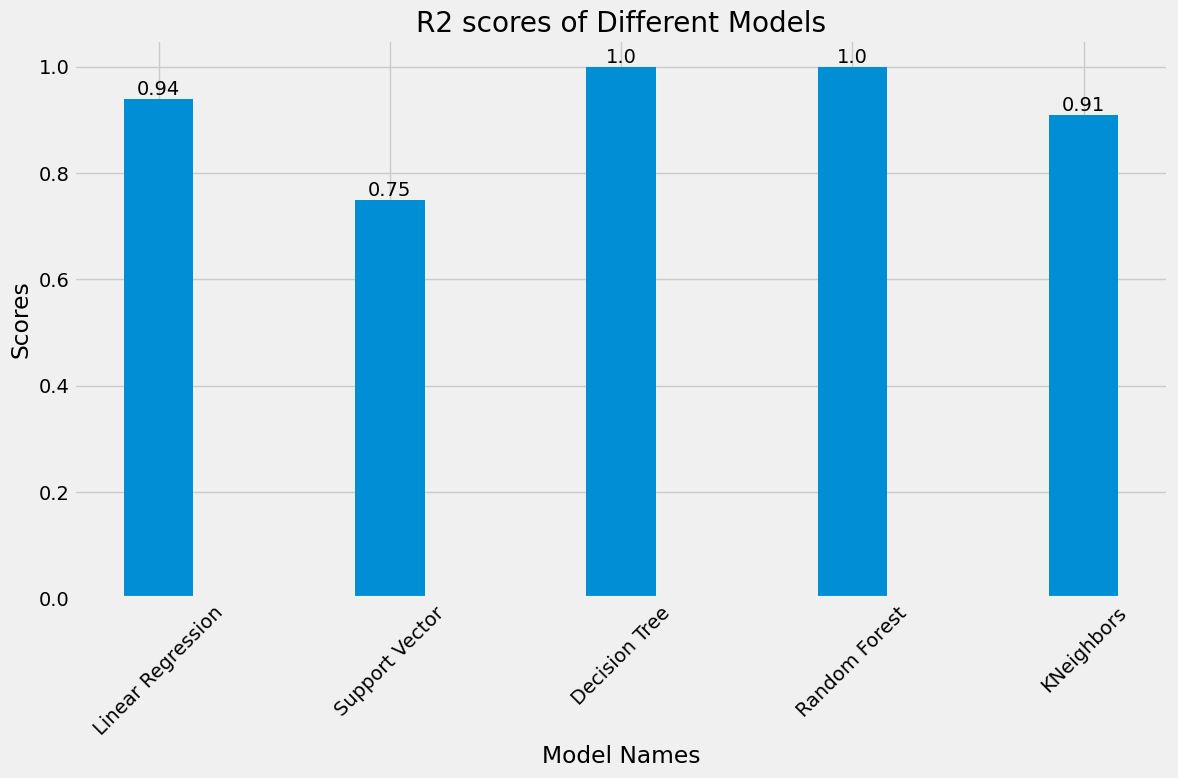

In [318]:
plt.style.use("fivethirtyeight")

plt.figure(figsize=(12, 8))

plt.bar(x = X_axis, height=Y_val, width=0.3)

plt.title("R2 scores of Different Models")
plt.xlabel("Model Names")
plt.ylabel("Scores")

plt.xticks(rotation = 45)

for i in range(len(X_axis)):
    plt.text(i, Y_val[i], Y_val[i], ha = 'center', va = 'bottom')

plt.tight_layout()

plt.show()

I have decided to implement the K-Nearest Neighbors (KNN) Regressor model for the project. The Decision Tree Regressor and Random Forest Regressor models both achieved nearly perfect scores, indicating overfitting. The Support Vector Machine (SVM) Regressor provided the lowest score. In contrast, the K-Nearest Neighbors and Linear Regression models achieved accuracies of 91% and 94%, respectively. 

I have chosen to proceed with the K-Nearest Neighbors model because the dataset is not straightforward enough for linear regression. The data may contain complex patterns that linear regression might struggle to capture, whereas K-Nearest Neighbors can adapt more flexibly to these patterns, potentially improving performance.